In [131]:
#Import python libraries
import pathlib
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Connect python and data
census = pathlib.Path('/Users/nataligracia/git/ca-school-enrollment-trend/all_employment_data_merged.csv')

In [132]:
#read research data to analyze the study results
data = pd.read_csv(census)

In [133]:
data

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Total!!Estimate!!Population 16 years and over,Total!!Estimate!!Population 20 to 64 years,Employment/Population Ratio!!Estimate!!Population 16 years and over,Employment/Population Ratio!!Estimate!!Population 20 to 64 years,Unemployment rate!!Estimate!!Population 16 years and over,Unemployment rate!!Estimate!!Population 20 to 64 years,NCESDist,year,School District Type,Estimate!!Total!!Population 16 years and over,Estimate!!Employment/Population Ratio!!Population 16 years and over,Estimate!!Unemployment rate!!Population 16 years and over,Estimate!!Total!!Population 20 to 64 years,Estimate!!Employment/Population Ratio!!Population 20 to 64 years,Estimate!!Unemployment rate!!Population 20 to 64 years
0,0,0,1,74447.0,58032.0,50.4,61.2,14.7,13.8,600014,2015,Unified,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,2,63117.0,47536.0,58.9,72.4,3.7,3.3,600016,2015,Unified,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,3,60729.0,41043.0,45.6,61.5,11.9,10.7,600017,2015,Unified,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,4,61495.0,46442.0,63.4,76.7,3.9,3.5,600020,2015,Unified,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,5,100489.0,77187.0,53.9,66.2,9.6,8.1,600027,2015,Unified,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,211,39,40,NaN,NaN,NaN,NaN,NaN,NaN,624660,2019,Secondary,137172.0,57.4,9.6,106224.0,68.9,8.5
1076,212,40,41,NaN,NaN,NaN,NaN,NaN,NaN,625150,2019,Secondary,211497.0,55.7,7.3,158512.0,69.3,6.8
1077,213,41,42,NaN,NaN,NaN,NaN,NaN,NaN,626310,2019,Secondary,96912.0,67.0,2.9,75135.0,79.8,2.7
1078,214,42,43,NaN,NaN,NaN,NaN,NaN,NaN,626880,2019,Secondary,74329.0,51.5,2.1,46552.0,71.1,2.4


In [134]:
cleanone = data.drop(columns=['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1'])

In [135]:
cleanone.columns

Index(['Total!!Estimate!!Population 16 years and over',
       'Total!!Estimate!!Population 20 to 64 years',
       'Employment/Population Ratio!!Estimate!!Population 16 years and over',
       'Employment/Population Ratio!!Estimate!!Population 20 to 64 years',
       'Unemployment rate!!Estimate!!Population 16 years and over',
       'Unemployment rate!!Estimate!!Population 20 to 64 years', 'NCESDist',
       'year', 'School District Type',
       'Estimate!!Total!!Population 16 years and over',
       'Estimate!!Employment/Population Ratio!!Population 16 years and over',
       'Estimate!!Unemployment rate!!Population 16 years and over',
       'Estimate!!Total!!Population 20 to 64 years',
       'Estimate!!Employment/Population Ratio!!Population 20 to 64 years',
       'Estimate!!Unemployment rate!!Population 20 to 64 years'],
      dtype='object')

In [136]:
{col:col.replace('Estimate!!',"") for col in cleanone.columns}

{'Total!!Estimate!!Population 16 years and over': 'Total!!Population 16 years and over',
 'Total!!Estimate!!Population 20 to 64 years': 'Total!!Population 20 to 64 years',
 'Employment/Population Ratio!!Estimate!!Population 16 years and over': 'Employment/Population Ratio!!Population 16 years and over',
 'Employment/Population Ratio!!Estimate!!Population 20 to 64 years': 'Employment/Population Ratio!!Population 20 to 64 years',
 'Unemployment rate!!Estimate!!Population 16 years and over': 'Unemployment rate!!Population 16 years and over',
 'Unemployment rate!!Estimate!!Population 20 to 64 years': 'Unemployment rate!!Population 20 to 64 years',
 'NCESDist': 'NCESDist',
 'year': 'year',
 'School District Type': 'School District Type',
 'Estimate!!Total!!Population 16 years and over': 'Total!!Population 16 years and over',
 'Estimate!!Employment/Population Ratio!!Population 16 years and over': 'Employment/Population Ratio!!Population 16 years and over',
 'Estimate!!Unemployment rate!!Popu

In [137]:
cleantwo = cleanone.loc[cleanone.iloc[:,0].isnull()]\
                    .dropna(axis=1)\
                    .rename(columns={col:col.replace('Estimate!!',"") for col in cleanone.columns})

In [138]:
cleanthree = cleanone.loc[cleanone.iloc[:,0].notnull()]\
                    .dropna(axis=1)\
                    .rename(columns={col:col.replace('Estimate!!',"") for col in cleanone.columns})

In [139]:
cleanfour = pd.concat([cleantwo,cleanthree],ignore_index=True)

In [140]:
cleanfour

,NCESDist,year,School District Type,Total!!Population 16 years and over,Employment/Population Ratio!!Population 16 years and over,Unemployment rate!!Population 16 years and over,Total!!Population 20 to 64 years,Employment/Population Ratio!!Population 20 to 64 years,Unemployment rate!!Population 20 to 64 years
0,604740,2018,Unified,109560.0,58.1,3.9,79537.0,69.6,3.6
1,634710,2018,Unified,63248.0,62.3,3.8,49083.0,75.9,3.3
2,604290,2018,Unified,50539.0,56.1,3.4,34450.0,74.2,3.6
3,610620,2018,Unified,71904.0,50.2,5.8,52289.0,61.1,4.7
4,611110,2018,Unified,166990.0,46.8,10.7,104703.0,67.2,10.4
...,...,...,...,...,...,...,...,...,...
1075,638640,2017,Secondary,390043.0,54.6,9.0,301252.0,67.1,7.5
1076,638790,2017,Secondary,93797.0,59.0,5.0,62959.0,74.3,5.4
1077,639930,2017,Secondary,57010.0,57.6,5.9,45072.0,69.7,5.0
1078,642480,2017,Secondary,177140.0,58.6,3.5,133678.0,72.9,3.2


In [141]:
#final["Total!!Population 16 years and over"].sort_values()

In [142]:
cleanfive = cleanfour.replace(-999999999.0,np.nan)

In [143]:
final = cleanfive.astype({"year":str})

In [144]:
final.to_csv("/Users/nataligracia/git/ca-school-enrollment-trend/CensusDataFinal.csv")

In [145]:
#final.dtypes

In [ ]:
#final["School District Type"].value_counts()

In [146]:
import random

In [147]:
edu = random.choices(final.NCESDist.unique(),k=5)

In [148]:
group = final.loc[final.NCESDist.isin(edu)]

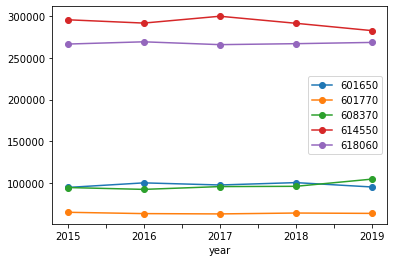

In [126]:
ax= plt.subplot()

for district,df in group.groupby("NCESDist"):
    df.sort_values("year").plot(ax=ax,marker="o",label=district,x="year",y="Total!!Population 16 years and over")